# BUDT 758X Project Update: Data Exploration of Yelp

---

## Introduction


#### Backgroud and questions of interests

Restaurants are essential in people's lives and most of us have experience of rating and writing reviews for a restaurant. The goal of this project is to perform data analysis on the Yelp restaurant dataset, which consists of customer review texts, restaurant rankings, location information, etc. from a variety of restaurants. 

At a high level, we want to find out which attributes of the restaurants lead to higher restaurant ratings and whether we can make further inference about the restaurant using text reviews. More specifically, our questions of interests consist of 3 perspectives: user, restaurant, and Yelp. For users, we want to study their rating and reviewing patterns. For restaurants, we want to find out the characteristics of high rating restaurants. For Yelp, we want to study the characteristics of reviews for better recommendations for its users.

By gathering insights about the customer base and developing strategic factors that would influence a customer’s decision to visit a particular restaurant, not only can we help diners find the most desired restaurant by attributes such as quality of a restaurant or best cuisines, but also we can provide recommendations for restaurants to expand their business by attracting more customers and by improving clients experiences and targeting particular customers. In addition, for Yelp's perspective, we want to help Yelp to improve its recommendation system.


#### Dataset Description  

We chose the Yelp dataset from Kaggle because the data is feasible and has potential due to large volumes (10GB). Besides, since the information is gathered from the Yelp website, which is one of the most renowned review platforms which had a monthly average of 76.7 million unique visitors via its mobile website in 2019, it is authentic and will help us develop practical insights.

The dataset includes 5.2 million user reviews of 174,000 businesses in 11 metropolitan areas in four countries. However, our project will only be focusing on data of restaurants in Nevada, which is the state with the highest total amount of review counts across all U.S. states.

We acquired 7 datasets in csv format: yelp_business_attributes.csv, yelp_business.csv, yelp_business_hours.csv, yelp_checkin.csv, yelp_tip.csv, yelp_review.csv, yelp_user.csv.

Some important attributes of the main 2 datasets we are using are described below:

yelp_review:
+ business_id: ID of the business
+ review_id: ID of the review
+ user_id: ID of the user
+ business_id: ID of the business
+ stars: ratings of the business
+ date: review date
+ text: review from the user
+ useful: number of users who vote a review as useful
+ funny: number of users who vote a review as funny
+ cool: number of users who vote a review as cool


yelp_user:
+ user_id:ID of the user
+ name: name of the user
+ review_count: number of reviews received
+ yelping_since: the start date of using yelp
+ useful: number of users who vote the user as useful
+ funny: number of users who vote the user as funny
+ cool: number of users who vote the user as cool
+ fans: number of users of the user
+ average_stars: average rating of the user
+ 11 compliment dummy variables


#### Grading Emphasis

We have performed many operations on data screening, cleaning, segmentation and merging, but we focused on data analysis. According to the data, we started our analysis on yelp users, then yelp restaurants, and finally returned to the evaluation of yelp reviews to get the full understanding of data. 

For example, in order to find features for better model predictions on restaurants average stars, we drew a heatmap to see the correlation between the variables. To visualize whether the restaurants' open hour will impact users’ review, we created a time series plot, so it is clear to view the trend of how users’ review changed with open hours. In order to get a better sense of the comparison between central_users ratings and average business ratings, we plotted a dynamic multi bar charts which shows their differences. Besides, to help yelp users search for restaurants with the top five popular cuisines, we plotted a dynamic map which shows the locations of each restaurant. According to the map, users can easily find the geographic locations of those restaurants.

For our model, we made sentiment analysis and built up a bidirectional LSTM model to analyze and predict reviewers' rating on restaurants in Nevada, and reached an accuracy of over 66%. In the review analysis, we used NLP methods to process, clean our text, and convert them to tokens. We did not only bin reviews into high star rating groups and low star rating groups. We took the extra step to bin the reviews into categories, so that we could analyze differences across categories to get further insight about differences in keywords appearance between high and low rated reviews.

## Data Processing

We imported our Yelp data in CSV format using method pd.read_csv directly from Google Shared Drive, aiming at efficient group collaboration and code sharing.
+ We have encountered large-volume data loading issues, i.e. slow on data reading and transforming, as a typical case for Yelp review data, which sized over 10 GB, we built a data-type schema for a faster read.

Trim Dataset in Nevada: During this part of data processing, In order to tackle the mounted memory errors and code efficiency issues, we wrote codes that are more complex.


- To begin with, we chose yelp_business data, from which we first extracted business identifiers whose location was in Nevada.
- Then, we merged business data that only contains Nevada with Yelp review dataframe and Yelp user dataframe.
- Afterward, we manually selected from 1294 entities' categories that should be categorized as restaurants in common sense, and applied which to our combined dataframe, which consisted of Yelp business and the respective business hour, user and user review.
---

**The final output of our combined Nevada restaurant dataframe contains a total of 1185998 rows.**

### Data Acquisition

#### 1. Import the Dataset

We start by importing Yelp dataset. The data is collected by interacting with Google Shared Drive.

In [ ]:
# data clean misc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns  

# sklearn misc
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import KMeans


# neural network misc
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import PReLU, Embedding, Bidirectional, LSTM, Dropout, Conv1D, Dense, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


# nlp misc
import re
import string, itertools
from collections import Counter, defaultdict
import nltk
nltk.download('stopwords')
from nltk.util import ngrams
from textblob import TextBlob
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud


# graph misc
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# import dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

proj_dir = "/content/drive/Shared drives/2020 Python Project/"
proj_data_dir = proj_dir + "data/"
# proj_data_dir = proj_dir + "new_data/yelp-dataset/"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Then let's get a sense of the Yelp dataset.

In [ ]:
!ls -l "/content/drive/Shared drives/2020 Python Project/data/"

total 11201522
-rw------- 1 root root 5945004052 May  3 15:48 Nevada_restaurant_user_review_business_hour.csv
-rw------- 1 root root   41377121 Apr  9 21:13 yelp_business_attributes.csv
-rw------- 1 root root   31760674 Apr  9 21:12 yelp_business.csv
-rw------- 1 root root   13866351 Apr  9 21:13 yelp_business_hours.csv
-rw------- 1 root root  135964892 Apr  9 21:14 yelp_checkin.csv
-rw------- 1 root root 3791120545 Apr  9 22:14 yelp_review.csv
-rw------- 1 root root  148085910 Apr  9 22:18 yelp_tip.csv
-rw------- 1 root root 1363176944 Apr  9 22:48 yelp_user.csv


The data here has a rich variety of the ratings, comments and metadata of businesses. Let's start exploring the dataset!



#### 2. Load the data

Here we load all the data from the raw datasets.

In [ ]:
# load raw data from csv
yelp_biz_attr = pd.read_csv(proj_data_dir + 'yelp_business_attributes.csv')
yelp_biz = pd.read_csv(proj_data_dir + 'yelp_business.csv')
yelp_biz_hour = pd.read_csv(proj_data_dir + 'yelp_business_hours.csv')
yelp_checkin = pd.read_csv(proj_data_dir + 'yelp_checkin.csv')
yelp_tip = pd.read_csv(proj_data_dir + 'yelp_tip.csv')
yelp_user = pd.read_csv(proj_data_dir + 'yelp_user.csv')

In [ ]:
def reload_review():
  # chunking the data for memory safety
  # a template of yelp review data
  review_dtype = dict(
      review_id=np.str,
      user_id=np.str,
      business_id=np.str,
      stars=np.float16,
      text=np.str,
      useful=np.int16,
      funny=np.int16,
      cool=np.int16)
  
  global yelp_review
  date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
  yelp_review = pd.read_csv(proj_data_dir + 'yelp_review.csv',
                            #skiprows=sk_review,
                            dtype=review_dtype,
                            parse_dates=[4,],
                            date_parser=date_parser, 
                            chunksize=300000)
  

reload_review()

Let's have a general sense of what the reviews are like. From the table below, we can see there are 9 columns in total, including 3 ids, stars rating, review date, review content, and 3 tags ('useful', 'funny', and 'cool).

In [ ]:
next(yelp_review).head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5.0,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5.0,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5.0,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4.0,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4.0,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


Let's take a look at the users table too. The variable 'user_id' can be used to join the review table and users table. Other useful variables include 'name', 'review_count', 'yelping_since', 'fans', and 'elite'.

In [ ]:
yelp_user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


### Data Selection

#### 1.Counts of Reviews in Different States

This is a large dataset that spans over 11 metropolitan areas. Here we want to create a bar chart of all the review counts in different states. By showing this, we can see that Nevada has the highest number of review counts. We will filter the data by only including data from Nevada, so that we can narrow down our research scope and avoid computer capacity issues. This dataset will be used for our future analysis.

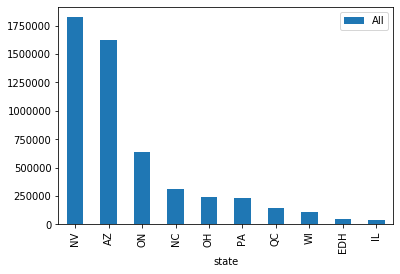

In [ ]:
#create a pivot table of review_count and state
review_by_state = pd.pivot_table(yelp_biz, "review_count", "state", "stars", np.sum, dropna=True, fill_value=0, margins=True)
# review_by_state = yelp_biz.groupby(["city", "stars"]).agg({"review_count": np.sum})
review_by_state.drop('All', inplace=True)
review_by_state.sort_values("All", inplace=True, ascending=False)
review_by_state.reset_index(inplace=True)
review_by_state.head(10).plot(kind='bar', x="state", y='All')

#### 2.Trim the datasets in Nevada

We select Nevada as the state that we will focus our analysis on because it has the highest number of reviews across all U.S. states. Now let's trim the dataset.

In [ ]:
# make a unique list of business in only Nevada
NV_biz = yelp_biz.loc[yelp_biz["state"] == 'NV']
srs_NV_biz_id = NV_biz["business_id"].unique()

reload_review()
NV_rvw_container = []
for rvw_chunk in yelp_review:
  NV_rvw_chunk = rvw_chunk[rvw_chunk.business_id.isin(srs_NV_biz_id)]
  NV_rvw_container.append(NV_rvw_chunk)


NV_review = pd.concat(NV_rvw_container)
NV_review_biz = pd.merge(NV_biz, NV_review, on="business_id", how="right", suffixes=("_biz", "_rvw"))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [ ]:
NV_review_biz_usr = pd.merge(NV_review_biz, yelp_user, on="user_id", how="left", suffixes=("_rvw", "_usr"))
NV_usr_review_biz_hour = pd.merge(NV_review_biz_usr, yelp_biz_hour, on="business_id", how="left")
# delete intermediate variable to save memory
del NV_review_biz_usr
NV_biz_attr = pd.merge(NV_biz, yelp_biz_attr, on="business_id", how="left")

#### 3.Extract and Merge the Restaurant Data

Let's take a look at all the categories by counting the unique category. Here we have 1294 unique categories.




In [ ]:
all_category = yelp_biz.categories.str.split(';').explode()
unique_category = np.unique(all_category.dropna())
len(unique_category)

1294

We have filtered categories we need by manually selecting categories related to food and beverages, such as bars and restaurants. We omitted other categories such as sports and entertainment. Then we saved the selected categories as `categories.txt` on the shared drive. Let's go and fetch it.

In [ ]:
with open(proj_dir + 'categories.txt', 'r', encoding='utf-8') as f:
  c_lst = f.read()

c_lst = c_lst.replace('\n\xa0', '').replace('\xa0', ' ')
restaurant_category = eval(c_lst)
restaurant_category[:5]

['American (New)', 'American (Traditional)', 'Afghan', 'African', 'Alsatian']

After creating the restaurants category list, now we filter the Nevada Restaurant data, and merge the datasets we need for future analysis.

In [ ]:
# Filter the Nevada restaurants data
# find businesses that are food services( restaurants of bars)
srs_bool_NV_restaurant = NV_biz.categories.str.contains("|".join(restaurant_category), regex=True)
srs_NV_restaurant_biz_id = NV_biz.business_id[srs_bool_NV_restaurant].unique()

# Merge all the Nevada restaurants business, reviews and hours datasets
NV_restaurant_usr_review_biz_hours = NV_usr_review_biz_hour[NV_usr_review_biz_hour.business_id.isin(srs_NV_restaurant_biz_id)]

# Merge all the Nevada restaurants attributes datasets
NV_biz_restaurant_attr = NV_biz_attr.loc[NV_biz_attr.business_id.isin(srs_NV_restaurant_biz_id)]
NV_biz_restaurant_attr = NV_biz_restaurant_attr.set_index('business_id')


C:\Anaconda\lib\site-packages\pandas\core\strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



#### "Shape of You"


Let's view the shape of our Nevada restaurant dataset. Here we can see it has 1185998 rows and 49 columns.

In [ ]:
NV_restaurant_usr_review_biz_hours.shape

(1185998, 49)

#### Data Cleaning

To answer our question of interests, we will use these columns from our datasets, thus we need to make sure there are no null values in columns listed here.


In [ ]:
# check null values in restaurant business hour data
NV_restaurant_usr_review_biz_hours.isnull().sum()

business_id                0
name_rvw                   0
neighborhood          194762
address                    0
city                       0
state                      0
postal_code              430
latitude                   0
longitude                  0
stars_biz                  0
review_count_rvw           0
is_open                    0
categories                 0
review_id                  0
user_id                    0
stars_rvw                  0
date                       0
text                       0
useful_rvw                 0
funny_rvw                  0
cool_rvw                   0
name_usr                 142
review_count_usr           0
yelping_since              0
friends                    0
useful_usr                 0
funny_usr                  0
cool_usr                   0
fans                       0
elite                      0
average_stars              0
compliment_hot             0
compliment_more            0
compliment_profile         0
compliment_cut

Here we find that although there are null values in "neighborhood", "postal_code", and "name_usr" column, it will not affect our analysis. There are no null values in the columns we need.

Next let's find out all the kinds of cuisines.

In [ ]:
# find all the cuisines in the state
with open(proj_dir + 'cuisine.txt', 'r', encoding='utf-8') as f:
  c_lst = f.read()

c_lst = c_lst.replace('\n\xa0', '').replace('\xa0', ' ')
restaurant_cuisine = eval(c_lst)
restaurant_cuisine[:5]

['American (New)', 'American (Traditional)', 'Afghan', 'African', 'Alsatian']

## Data Analysis

### a. Central User Impact Analysis


Certain reviewers have more friends who are also active on the review platform, so we define them as “central users”. We want to know how the ratings given by central users correlates to the corresponding restaurant average ratings.(In other words, are the values of these users’ ratings close to real average restaurant ratings? 

In [ ]:
NV_restaurant_usr_review_biz_hours.head()

,business_id,name_rvw,neighborhood,address,city,state,postal_code,latitude,longitude,stars_biz,...,compliment_funny,compliment_writer,compliment_photos,monday,tuesday,wednesday,thursday,friday,saturday,sunday
305,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.066914,-115.170848,4.0,...,1,0,0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30
306,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.066914,-115.170848,4.0,...,0,0,0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30
307,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.066914,-115.170848,4.0,...,0,0,0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30
308,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.066914,-115.170848,4.0,...,0,1,0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30
309,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.066914,-115.170848,4.0,...,0,0,0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30


In [ ]:
#10% lenghth of the dataset
L = round(len(NV_restaurant_usr_review_biz_hours)*0.1)

We will select the top 10% of the users who have the most fans on Yelp as central users. We decide to delete the first user because the number of its fans is over 7000, which is too high. Based on this, we assume this user is an outlier and do not consider this piece of data.

In [ ]:
# Get first 10% of the sorted user data
yelp_central_user=NV_restaurant_usr_review_biz_hours.sort_values(by=['fans'],ascending=False)[2:L]
yelp_central_user.head()

,business_id,name_rvw,neighborhood,address,city,state,postal_code,latitude,longitude,stars_biz,...,compliment_funny,compliment_writer,compliment_photos,monday,tuesday,wednesday,thursday,friday,saturday,sunday
666670,X8c23dur0ll2D9XTu-I8Qg,"""Hakkasan Nightclub""",The Strip,"""Mgm Grand Hotel And Casino, 3799 Las Vegas Bl...",Las Vegas,NV,89109,36.101375,-115.172452,2.5,...,7032,2410,1358,None,None,None,22:30-4:0,22:30-4:0,22:30-4:0,22:30-4:0
921513,lIDgEB1HnKAq03H1fpjzLQ,"""Bad Owl Coffee""",Anthem,"""10575 S Eastern Ave, Ste 160""",Henderson,NV,89052,35.999184,-115.106076,4.0,...,7032,2410,1358,7:0-19:0,7:0-19:0,7:0-19:0,7:0-19:0,7:0-20:0,7:0-20:0,7:0-19:0
462013,mU3vlAVzTxgmZUu6F4XixA,"""Momofuku Las Vegas""",The Strip,"""3708 S Las Vegas Blvd, Level 2""",Las Vegas,NV,89109,36.109755,-115.173877,4.0,...,7032,2410,1358,11:0-0:0,11:0-0:0,11:0-0:0,11:0-0:0,11:0-1:0,11:0-1:0,11:0-0:0
279120,iCQpiavjjPzJ5_3gPD5Ebg,"""Secret Pizza""",The Strip,"""The Cosmopolitan Of Las Vegas, 3708 Las Vegas...",Las Vegas,NV,89109,36.112372,-115.173064,4.0,...,7032,2410,1358,11:0-5:0,11:0-4:0,11:0-4:0,11:0-4:0,11:0-5:0,11:0-5:0,11:0-5:0
97744,gOOfBSBZlffCkQ7dr7cpdw,"""Chica""",The Strip,"""3355 South Las Vegas Blvd, Ste 106""",Las Vegas,NV,89109,36.122690,-115.170194,4.5,...,7032,2410,1358,8:0-23:0,8:0-23:0,8:0-23:0,8:0-23:0,8:0-23:0,10:0-23:0,10:0-23:0


Let's describe the data according to its statistics.

In [ ]:
yelp_central_user['stars_biz'].describe()

count    118598.00000
mean          3.71118
std           0.58892
min           1.00000
25%           3.50000
50%           4.00000
75%           4.00000
max           5.00000
Name: stars_biz, dtype: float64

In [ ]:
yelp_central_user['stars_rvw'].astype(float).describe()

count    118598.000000
mean          3.709498
std           1.041028
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: stars_rvw, dtype: float64

We can see that the values of their statistics are very close to each other.This tells us that there is no big difference between the values of average ratings given by our central yelp users and the average ratings of the businesses.

Let's extract the data for the first 300 central users, and plot their ratings versus the average business ratings to get a general sense of the comparisons between them.

In [ ]:
# create plots
# Grouped bar chart
import plotly.offline as py
import plotly.graph_objs as go
trace0 = go.Bar(
    x=yelp_central_user['name_rvw'][1:300],
    y=yelp_central_user['stars_rvw'][1:300],
    name = 'central_user_rating')

trace1 = go.Bar(
    x=yelp_central_user['name_rvw'][1:300],
    y=yelp_central_user['stars_biz'][1:300],
    name = 'average business rating'
)

data = [trace0, trace1]
layout = go.Layout(
    yaxis_title="Ratings",
    title='Central-Users Ratings Vs Average Business Ratings for Restaurant/Bar'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving bar_plot.png to bar_plot.png


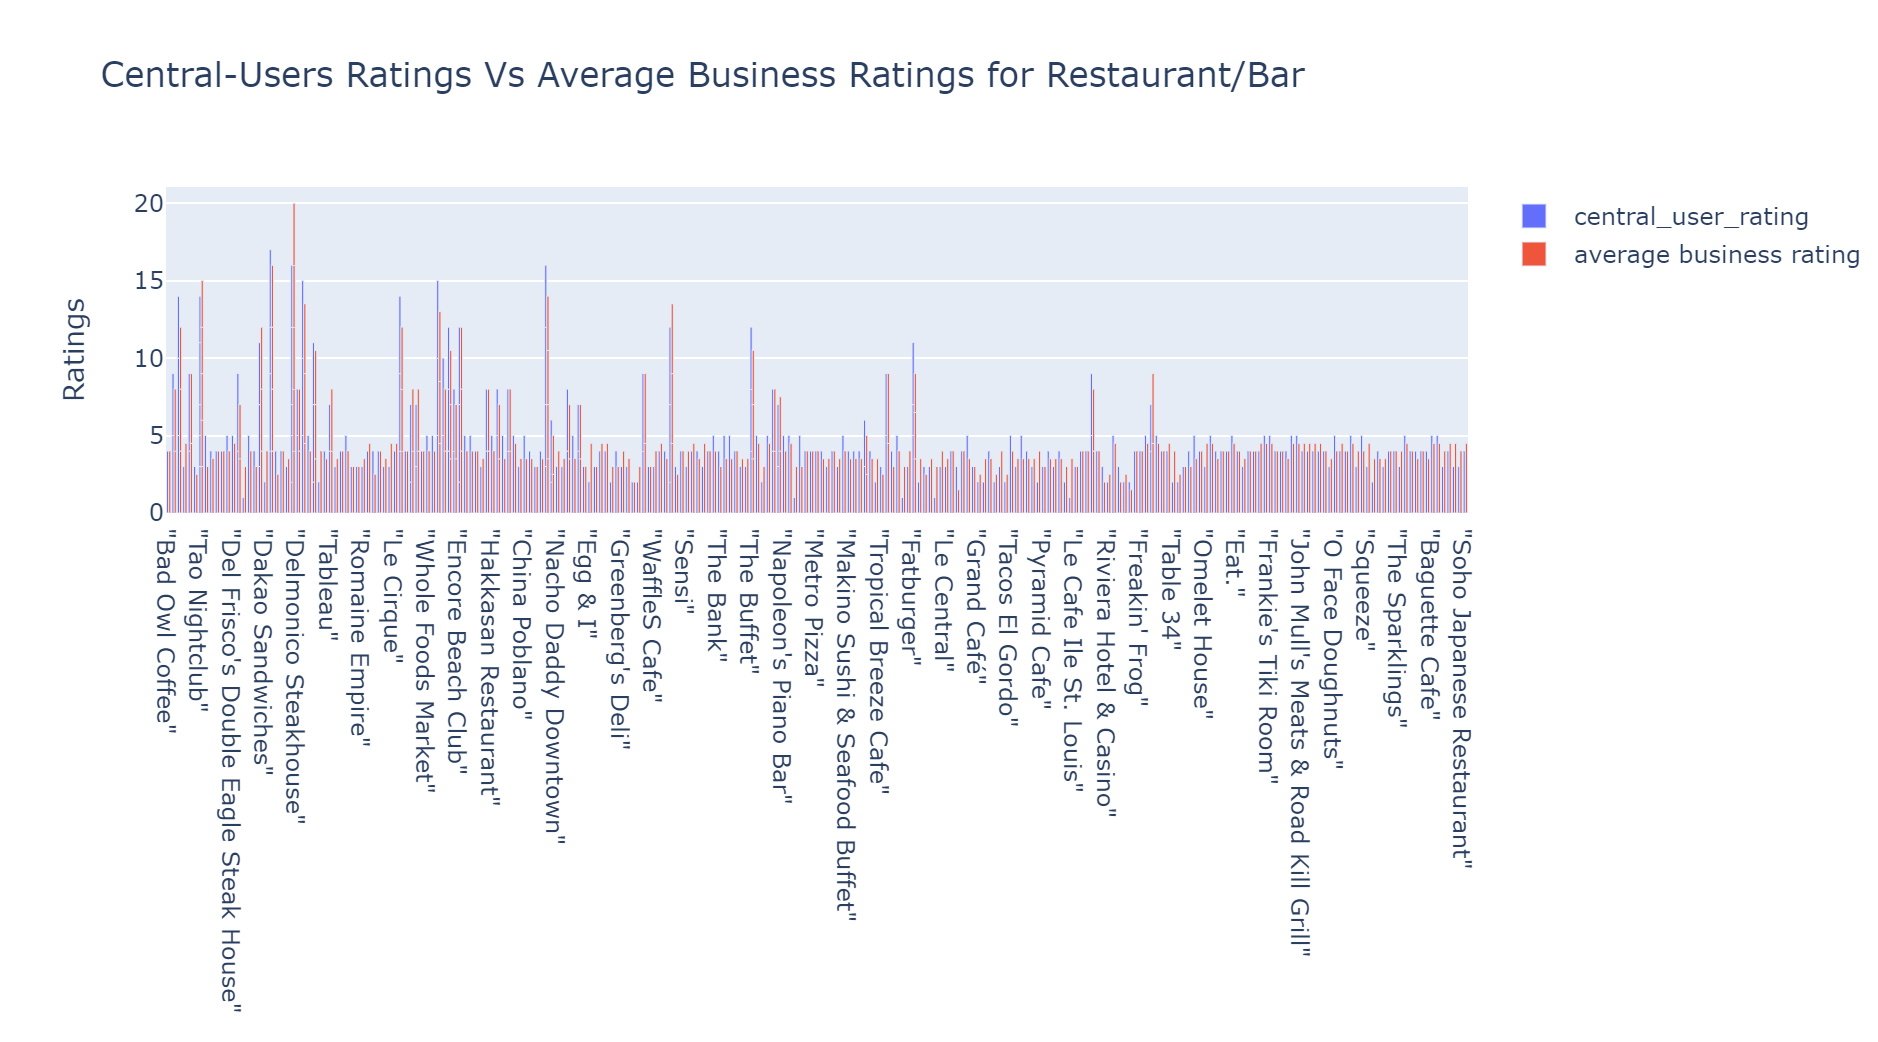

In [ ]:
Image('bar_plot.png')

For this sample - we can see the average ratings given by our central yelp users are very close to the average ratings of the businesses in most cases. This supports the fact that their statistics values are very close to each other and satisfy our prior expectations.

This means it will be very accurate for us to use the average rating given by central users to predict the true restaurant average rating. And the impact of ratings from central users on restaurants is very large.

Besides, the ratings of central users are slightly higher than average business rating. Those people might overrate the restaurants, and since they have more fans, they have larger influences on potential customers. Knowing that the central users have the tendency to overrate the restaurants, when the customers are reading their reviews, they need to be cautious whether their reviews are genuine.  

### b. Major Attributes Impact Analysis

What are the features that restaurants with high ratings have? We expect that restaurants with features like free WiFi, high review counts, and serving alcohol will have higher ratings.

In [ ]:
# Attributes that are shown lots of times and this can indicate these attributes might be very important.
# Extract all the attributes and normalize them
NV_biz_restaurant_attr_c = NV_biz_restaurant_attr.iloc[:,12:]
attr_columns = NV_biz_restaurant_attr_c.columns
for i in range(0, len(attr_columns)):
  NV_biz_restaurant_attr_c.iloc[:, i] = NV_biz_restaurant_attr_c.iloc[:, i].apply(lambda x: 1 if x == 'True' else 0)

In [ ]:
# Find the most common attributes
NV_biz_restaurant_attr_c.sum().sort_values(ascending = False).head(10)

BikeParking                   3256
BusinessParking_valet         2803
WheelchairAccessible          1592
BusinessParking_street         721
HappyHour                      632
DogsAllowed                    528
HairSpecializesIn_coloring     321
GoodForMeal_dinner             319
GoodForMeal_breakfast          318
BusinessParking_validated      281
dtype: int64

The most common attributes mentioned more than 500 times for a restaurant in NV are: "bike parking", "business parking valet", "wheel chair accessible", "business parking street", "happy hour" and "dogs allowed".

In [ ]:
# Set those variables as "common attributes"
common_attr = ['BikeParking', 'BusinessParking_valet', 'WheelchairAccessible',
               'BusinessParking_street', 'HappyHour', 'DogsAllowed']               

In [ ]:
# Put other variables in 'OtherAll' columns
count = 1
cols = []
for column in NV_biz_restaurant_attr_c.columns:
    if column not in common_attr:
        cols.append(f'Other')
        count+=1
        continue
    cols.append(column)
NV_biz_restaurant_attr_c.columns = cols

NV_biz_restaurant_attr_c = NV_biz_restaurant_attr_c[['BikeParking',
                                                     'BusinessParking_valet',
                                                     'WheelchairAccessible',
                                                     'BusinessParking_street',
                                                     'HappyHour',
                                                     'DogsAllowed',
                                                     'Other']]
NV_biz_restaurant_attr_c['OtherAll'] = NV_biz_restaurant_attr_c.iloc[:, 6:].sum(axis=1).apply(
    lambda x: 0 if x == 0 else 1
)
NV_biz_restaurant_attr_c = NV_biz_restaurant_attr_c.iloc[:,~NV_biz_restaurant_attr_c.columns.duplicated()].drop(columns = 'Other')
NV_biz_restaurant_attr_c['stars'] = NV_biz_restaurant_attr['stars']
NV_biz_restaurant_attr_c.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,BikeParking,BusinessParking_valet,WheelchairAccessible,BusinessParking_street,HappyHour,DogsAllowed,OtherAll,stars
business_id,,,,,,,,
Pd52CjgyEU3Rb8co6QfTPw,1,0,0,0,0,0,0,4.0
4srfPk1s8nlm1YusyDUbjg,0,0,0,0,0,0,0,2.5
n7V4cD-KqqE3OXk0irJTyA,0,1,1,1,0,0,0,3.0
MmR06_kNAbmOPK-0pKvGtA,0,0,0,0,0,0,0,4.0
F0fEKpTk7gAmuSFI0KW1eQ,0,0,0,0,0,0,0,1.5


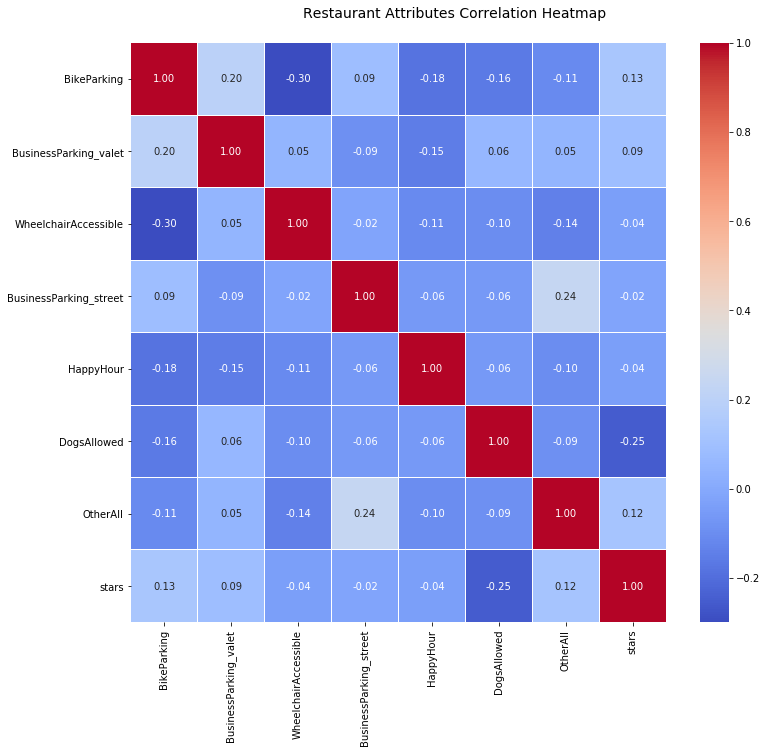

In [ ]:
# Plot the restaurant attributes correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))
corr = NV_biz_restaurant_attr_c.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
fig.subplots_adjust(top=0.93)
t= fig.suptitle('Restaurant Attributes Correlation Heatmap', fontsize=14)

Among all the correlations between features and stars, "dogs allowed" has the largest negative effect on stars, whereas "bike parking" has the largest positive effect on stars. When a restaurant with bike parking place and no dog allowed, it might have higher average stars. Among all the features, the correlation between each others is low, so we can go ahead and apply our linear regression model.



In [ ]:
# Preparation for prediction
attribute = NV_biz_restaurant_attr_c.iloc[:,:-1]
average_stars = NV_biz_restaurant_attr_c.iloc[:,-1]

In [ ]:
# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(
    attribute, average_stars, test_size=0.3, random_state=0)
model = LinearRegression().fit(X_train, y_train)

In [ ]:
# View the parameters of our model
print('The R^2 value of this model', model.score(attribute, average_stars))
print('The intercept of this model:', model.intercept_)
print('The coefficient of each variable:', model.coef_)

The R^2 value of this model 0.09457112059600037
The intercept of this model: 3.4708751033777387
The coefficient of each variable: [ 0.1289191   0.13882537 -0.0987604  -0.23041325 -0.11473992 -0.91640152
  0.22598524]


In [ ]:
# View the regression model
'stars={:.2f}+{:.2f}*BikeParking+{:.2f}*BusinessParking_valet+{:.2f}*WheelchairAccessible+{:.2f}*BusinessParking_street+{:.2f}*HappyHour+{:.2f}*DogsAllowed+{:.2f}*OtherAll'.format(
    model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3], model.coef_[4], model.coef_[5], model.coef_[6])

'stars=3.47+0.13*BikeParking+0.14*BusinessParking_valet+-0.10*WheelchairAccessible+-0.23*BusinessParking_street+-0.11*HappyHour+-0.92*DogsAllowed+0.23*OtherAll'

In [ ]:
# Create predictions
y_pred = model.predict(X_test)

In [ ]:
# View the MSE
print('Mean Squared Error:',
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 0.6256658323333104


In [ ]:
# Compare our prediction and actual value
star_predition = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
star_predition.head(10)

,Actual,Predicted
business_id,,
WrHu03srbhJAw6bnTIixdw,3.5,3.738620
vW65SNLam99SyOuVagNuvg,3.5,3.470875
K_URSTcq_chiWPcMpuo3Qw,3.5,3.734192
bPh7M1vos_V-g8_s-eHaNA,4.0,3.599794
l_4oSCuQ6AeMtNK5185xAA,3.5,3.356135
SMRg_KiTXeUb6xYlB98ocQ,2.5,3.599794
SzhD5J80IhpyeBftzQ950Q,4.0,2.554474
Vzax98BCkEM1uYibYCzqPQ,4.5,3.696860
f6K2ag5tqM_LMIQZbfRVRQ,4.5,3.696860


If we get new information about a restaurant, we can simply use this model to predict its average star. By comparing it to the actual star, we will know this restaurant is over rated or under rated.

### c. Famous Cuisine Analysis

What are the top 5 frequent cuisines in Nevada? What are the top restaurants by star rating for each cuisine? 

Based on categories we got that are related to food and beverages, we found there are different cuisines, and we are curious about which cuisines are most popular.

In [ ]:
#filter out all cuisines in the dataframe
NV_usr_review_biz_hour2= NV_restaurant_usr_review_biz_hours[NV_restaurant_usr_review_biz_hours['categories'].astype(str).str.contains('|'.join(restaurant_cuisine), regex=True)]
NV_usr_review_biz_hour2.head()

C:\Anaconda\lib\site-packages\pandas\core\strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



,business_id,name_rvw,neighborhood,address,city,state,postal_code,latitude,longitude,stars_biz,...,compliment_funny,compliment_writer,compliment_photos,monday,tuesday,wednesday,thursday,friday,saturday,sunday
767,F0fEKpTk7gAmuSFI0KW1eQ,"""Cafe Mastrioni""",Spring Valley,"""4250 S Rainbow Blvd, Ste 1007""",Las Vegas,NV,89103,36.111057,-115.241688,1.5,...,6,13,35,None,None,None,None,None,None,None
768,F0fEKpTk7gAmuSFI0KW1eQ,"""Cafe Mastrioni""",Spring Valley,"""4250 S Rainbow Blvd, Ste 1007""",Las Vegas,NV,89103,36.111057,-115.241688,1.5,...,1,1,0,None,None,None,None,None,None,None
769,F0fEKpTk7gAmuSFI0KW1eQ,"""Cafe Mastrioni""",Spring Valley,"""4250 S Rainbow Blvd, Ste 1007""",Las Vegas,NV,89103,36.111057,-115.241688,1.5,...,0,0,0,None,None,None,None,None,None,None
1435,dPxZI9lrKTl5dvFfnb1_Ig,"""Trattoria Italia""",Anthem,"""9905 S Eastern Ave, Ste 140""",Las Vegas,NV,89183,36.010086,-115.118656,4.5,...,2,0,0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-21:0
1436,dPxZI9lrKTl5dvFfnb1_Ig,"""Trattoria Italia""",Anthem,"""9905 S Eastern Ave, Ste 140""",Las Vegas,NV,89183,36.010086,-115.118656,4.5,...,10,2,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-21:0


In [ ]:
#explode column "category"
all_cuisines = NV_usr_review_biz_hour2.categories.str.split(';').explode().sort_values(ascending=False)

In [ ]:
#filter out all cuisines in the column "category"
all_cuisines2=all_cuisines.str.contains('|'.join(restaurant_cuisine), regex=True)
all_cuisines[all_cuisines2].value_counts().head(10)

C:\Anaconda\lib\site-packages\pandas\core\strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



Mexican       94428
Japanese      89934
Italian       84581
Thai          33720
French        32530
Korean        24964
Hawaiian      21124
Vietnamese    18836
Southern      16221
Greek         12249
Name: categories, dtype: int64

From the dataset, we can see the top five most popular cuisines are Thai, French, Korean, Hawaiian, and Vietnamese. Based on this, Let's find what the top restaurants are for each cuisine by star rating.

In [ ]:
#filter out all the Thai restaurants
Thai= NV_usr_review_biz_hour2[NV_usr_review_biz_hour2['categories'].astype(str).str.contains('Thai')]
Thai=Thai.sort_values(by='stars_biz',ascending=False).head(10)

In [ ]:
#find top restaurants
Thai=Thai.drop_duplicates(subset='name_rvw')
Thai['name_rvw']

245223          "Mr. Bangkok"
483227    "Andrada Muay Thai"
Name: name_rvw, dtype: object

In [ ]:
#filter out all the French restaurants
French= NV_usr_review_biz_hour2[NV_usr_review_biz_hour2['categories'].astype(str).str.contains('French')]
French=French.sort_values(by='stars_biz',ascending=False).head(10)

In [ ]:
#find top restaurants
French=French.drop_duplicates(subset='name_rvw')
French['name_rvw']

73296     "Yanni's Bistro"
908535    "Bonjour Bistro"
Name: name_rvw, dtype: object

In [ ]:
#filter out all the Korean restaurants
Korean= NV_usr_review_biz_hour2[NV_usr_review_biz_hour2['categories'].astype(str).str.contains('Korean')]
Korean=Korean.sort_values(by='stars_biz',ascending=False).head(10)

In [ ]:
#find top restaurants
Korean=Korean.drop_duplicates(subset='name_rvw')
Korean['name_rvw']

1529136         "Hon Pocha"
1805249    "Island Style 2"
Name: name_rvw, dtype: object

In [ ]:
#filter out all the Hawaiian restaurants
Hawaiian= NV_usr_review_biz_hour2[NV_usr_review_biz_hour2['categories'].astype(str).str.contains('Hawaiian')]
Hawaiian=Hawaiian.sort_values(by='stars_biz',ascending=False).head(10)

In [ ]:
#find top restaurants
Hawaiian=Hawaiian.drop_duplicates(subset='name_rvw')
Hawaiian['name_rvw']

1610116    "Poke Express"
Name: name_rvw, dtype: object

In [ ]:
#filter out all the Vietnamese restaurants
Vietnamese= NV_usr_review_biz_hour2[NV_usr_review_biz_hour2['categories'].astype(str).str.contains('Vietnamese')]
Vietnamese=Vietnamese.sort_values(by='stars_biz',ascending=False).head(10)

In [ ]:
#find top restaurants
Vietnamese=Vietnamese.drop_duplicates(subset='name_rvw')
Vietnamese['name_rvw']

1131022    "Bosa Boba Cafe"
Name: name_rvw, dtype: object

From the result we can see that "Yanni's Bistro" and "Bonjour Bistro" have highest review ratings for French Food.
"Hon Pocha" and "Island Style 2" have highest review ratings for Korean Food. "Poke Express" has highest review ratings for Hawaiian Food. "Bosa Boba Cafe" has highest review ratings for Vietnamese Food. Finally, "Mr. Bangkok" and "Andrada Muay Thai" have highest review ratings for Thai Food.

Let's create a map and see where these restaurants are located. Are they close to each other? What can we learn from it?

In [ ]:
# Enter the OWN mapbox token
mapbox_access_token =  'pk.eyJ1IjoiZXZhemhvdTExNyIsImEiOiJjazlnNjFkbXkwY284M2tvMnN1NWNreG5xIn0.q3Q1pKC8fZcAPrjaoGNyyg'

In [ ]:
#create a map
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattermapbox(
        
        text = French['name_rvw'],
        lon = French['longitude'],
        lat = French['latitude'],
        hoverinfo='text',
        mode = 'markers',
        name='French',
        marker = dict(
                    color = 'green',
                    symbol = 'circle',
                    size=8
                )
    ))

fig.add_trace(go.Scattermapbox(
        text = Hawaiian['name_rvw'],
        lon = Hawaiian['longitude'],
        lat = Hawaiian['latitude'],
        mode = 'markers',
        name='Hawaiian',
        marker = dict(
                    color = 'red',
                    size=8          
                )

    ))
fig.add_trace(go.Scattermapbox(
        text = ['name_rvw'],
        lon = Korean['longitude'],
        lat = Korean['latitude'],
        mode = 'markers',
        name='Korean',
        marker = dict(
                    color = 'blue',
                    size=8          
                )

    ))

fig.add_trace(go.Scattermapbox(
        text = Vietnamese['name_rvw'],
        lon = Vietnamese['longitude'],
        lat = Vietnamese['latitude'],
        mode = 'markers',
        name='Vietnamese',
        marker = dict(
                    color = 'orange',
                    size=8          
                )

    ))

fig.add_trace(go.Scattermapbox(
        text = Thai['name_rvw'],
        lon = Thai['longitude'],
        lat = Thai['latitude'],
        mode = 'markers',
        name='Thai',
        marker = dict(
                    color = 'yellow',
                    size=8          
                )

    ))

fig.update_layout(
        title = 'Top Restaurantstop for each cuisine',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=1
        )
    )

fig.show()

In [ ]:
uploaded = files.upload()

Saving map_plot.png to map_plot.png


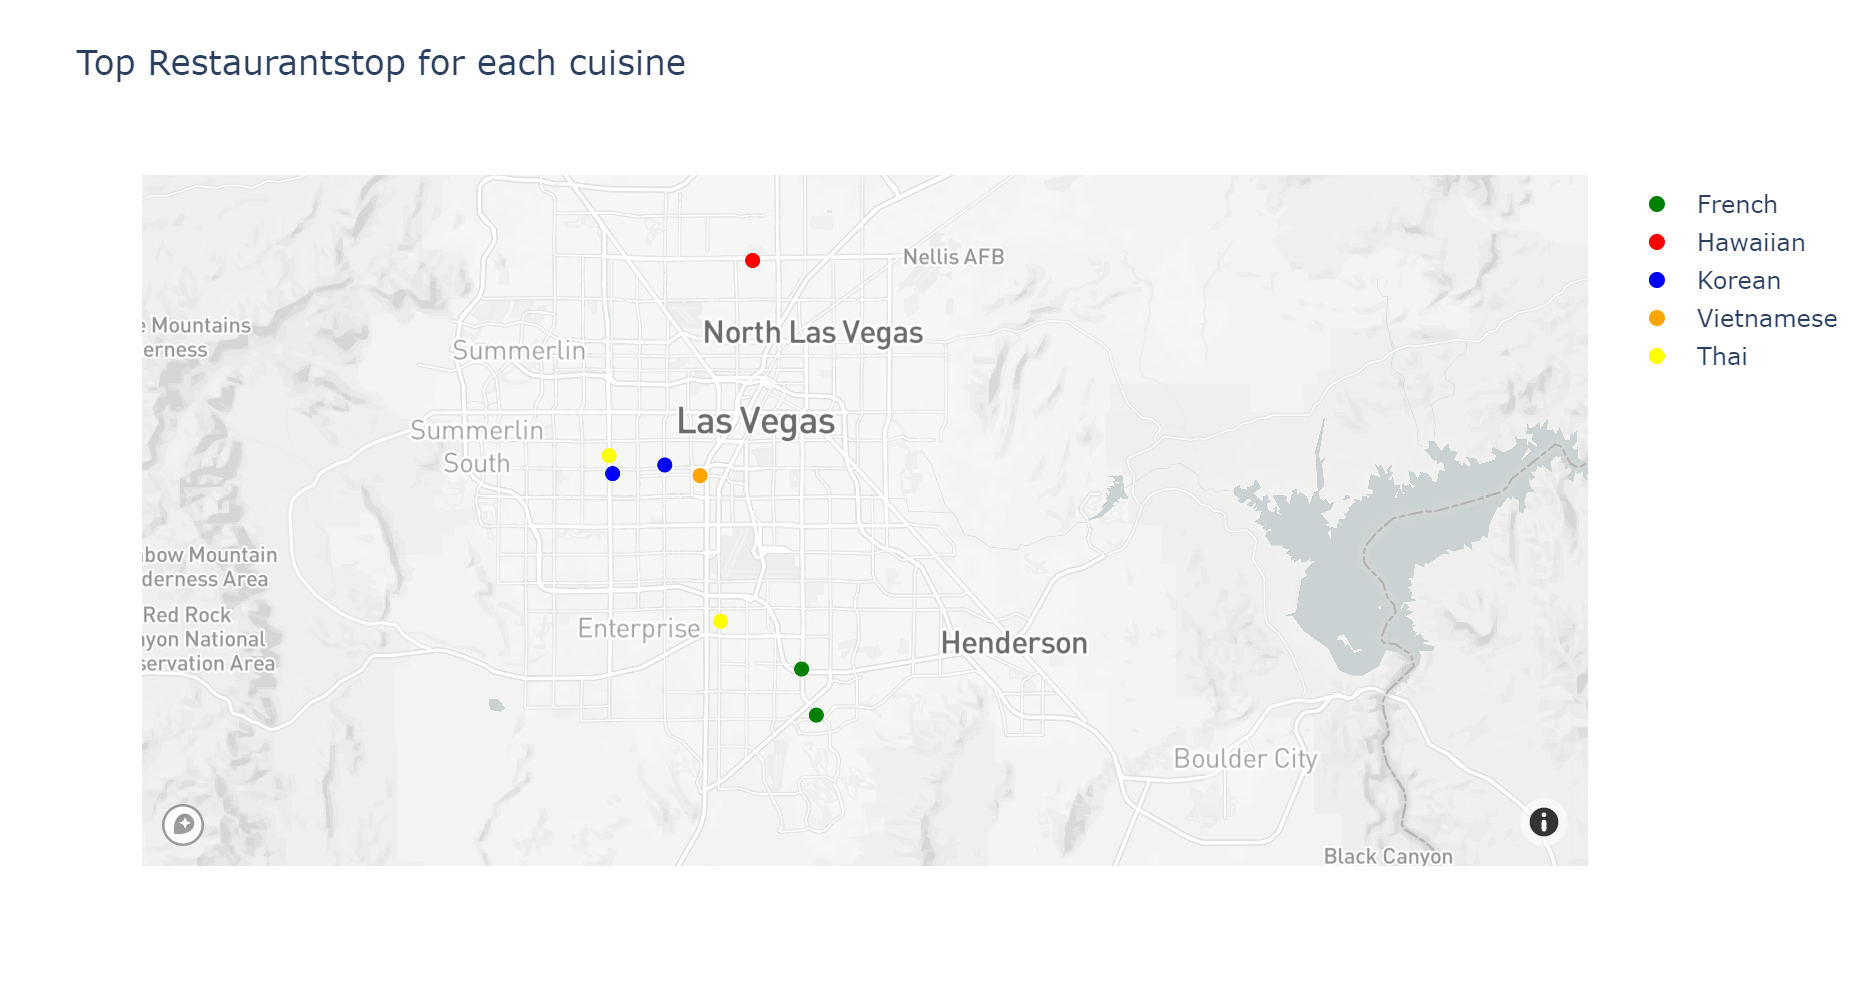

In [ ]:
Image('map_plot.png')

We can see most of these popular restaurants are located in Las Vegas, and they are very spread out. 

There might be two reasons: 

First, Las Vegas is one of the most popular cities for travelling in America, so it has a lot of Foreign tourists coming in every day. Most foreign tourists tend to choose their home food, which results in the popularity of restaurants that provide foreign cuisines. 

Second, the population in Las Vegas is relatively large compared to other cities, so the dining market is more competitive, so the possibility that Las Vegas has better restaurants is much higher because of the competition.

### d. Operation Recommendation Analysis

What is the relation between restaurants opening time and their review stars? We expect that restaurants with opening time during meal time (lunch and dinner) will have higher review stars.

To solve this question, we first need to filter out null values of the Monday operating hours. Then extract the Monday opening hour and transform it to date format. Finally, we plot the time series line chart to see the results.

In [ ]:
#Filter out null values
NV_usr_review_biz_hour=NV_restaurant_usr_review_biz_hours[NV_restaurant_usr_review_biz_hours['monday'].notnull()].reset_index()
NV_usr_review_biz_hour=NV_restaurant_usr_review_biz_hours[NV_restaurant_usr_review_biz_hours["monday"] != 'None']

In [ ]:
NV_usr_review_biz_hour.head(3)

,business_id,name_rvw,neighborhood,address,city,state,postal_code,latitude,longitude,stars_biz,...,compliment_funny,compliment_writer,compliment_photos,monday,tuesday,wednesday,thursday,friday,saturday,sunday
305,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.066914,-115.170848,4.0,...,1,0,0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30
306,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.066914,-115.170848,4.0,...,0,0,0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30
307,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.066914,-115.170848,4.0,...,0,0,0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30


In [ ]:
# Extract Monday open hour 
NV_usr_review_biz_hour.loc[:,'Monday_open_hour'] = NV_usr_review_biz_hour['monday'].astype(str).str.split('-').str[0]

# Convert it to datetime type
NV_usr_review_biz_hour.loc[:,'Monday_open_hour'] = NV_usr_review_biz_hour['Monday_open_hour'].map(lambda i: datetime.strptime(i,'%H:%M'))
NV_usr_review_biz_hour.loc[:,'Monday_open_hour'] = NV_usr_review_biz_hour['Monday_open_hour'].map(lambda t: dt.datetime(year=2020, month=3, day=31, hour=t.hour, minute=t.minute))

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
NV_usr_review_biz_hour.set_index('Monday_open_hour',inplace=True)

Text(0, 0.5, 'Stars')

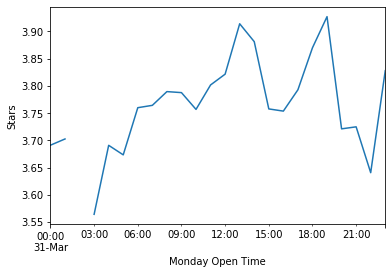

In [ ]:
#Plot the open time versus stars
NV_usr_review_biz_hour['average_stars'].resample('1H').mean().plot()
plt.xlabel ('Monday Open Time')
plt.ylabel ('Stars')

From this graph, we know that the relationship between average stars and restaurant open time fluctuates throughout the day. Generally speaking, the average star rating is lower when the restaurant opens at night after 8pm and higher when it opens at lunch time (around 12pm) or dinner time (around 6pm). There might be several reasons for this trend. 
First, the quality of the food may be higher at lunch time or dinner time, as they are mostly fresh made. While at late night, the ingredients may not be fresh.
Second, the atmosphere of the restaurants might be better during lunch time or dinner time, as some restaurants offer special services such as live music during those times. 
Third, customers tend to get drunk at late night, so they may not have an accurate opinion about the restaurants.
Fourth, at lunch or dinner time, people tend to be hungry and easy to be satisfied, so they are more generous to give higher stars.

### e. Sentiment Analysis



Are the customer ratings in line with their text reviews? i.e. Do customers contradict themselves when they rate the restaurant overall from 1-5 and when they write a text review? We expect that most customer ratings are in line with their text reviews. To accomplish this, we will introduce a new numerical variable called “sentiment”, which is calculated by the positive and negative words found in review text.


In [ ]:
# take a look at review text
NV_restaurant_usr_review_biz_hours['text'].head()

305    Nice, open bar with great views of the strip a...
306    We usually stop here after using the driving r...
307    The first time we ate here everything was good...
308    So I took my daughter there for breakfast and ...
309    This restaurant has a new name it used to be c...
Name: text, dtype: object

In [ ]:
# Apply sentiment analysis on each of the review text, should return average sentiment score with a range of -1 to 1
NV_restaurant_usr_review_biz_hours.loc[:, "sentiment"] = NV_restaurant_usr_review_biz_hours['text'].apply(lambda x: TextBlob(x).sentiment[0])

In [ ]:
# Save the output for fast read next time
NV_restaurant_usr_review_biz_hours.to_csv(proj_data_dir+"Nevada_restaurant_user_review_business_hour.csv", index=False)

In [ ]:
NV_restaurant_usr_review_biz_hours = pd.read_csv(proj_data_dir + "Nevada_restaurant_user_review_business_hour.csv")

In [ ]:
# correlation between sentiment and review stars
NV_restaurant_usr_review_biz_hours[["sentiment", 'stars_rvw']].corr()

,sentiment,stars_rvw
sentiment,1.000000,0.615239
stars_rvw,0.615239,1.000000


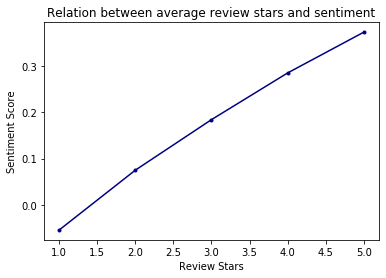

In [ ]:
ax = (NV_restaurant_usr_review_biz_hours
 .groupby('stars_rvw')["sentiment"]
 .agg(np.mean)
 .plot(kind='line', 
       marker='.',
       colormap='jet',
       title="Relation between average review stars and sentiment")
)
ax.set_xlabel("Review Stars")
ax.set_ylabel("Sentiment Score")
plt.show()

In [ ]:
# Set static variables of the model
TRUNCATE_TYPE ='post'
PADDING_TYPE = 'post'
OOV_TOKEN = "<OOV>"
PADDING_LEN = 80
VOCAB_SIZE = 100000
stopword = stopwords.words('english')

In [ ]:
# Extract train data and labels
NV_full = NV_restaurant_usr_review_biz_hours.dropna()
bad_record = ((NV_full.stars_rvw <= 2) & (NV_full.sentiment > 0)) | \
              ((NV_full.stars_rvw >= 4) & (NV_full.sentiment < 0))
part_of_NV = NV_full.loc[~bad_record]

rvw_y = part_of_NV['stars_rvw']
rvw_X = part_of_NV["text"]

In [ ]:
# Create a function to remove stopword in context
def remove_stopword(row: str) -> str:
  for word in stopword:
    token = " " + word + " "
    row = row.replace(token, " ")

  return row

rvw_X = rvw_X.apply(remove_stopword)

> Tensorflow Tokenizer removes punctuation, lower strings and tokenize strings internally.


In [ ]:
# Create a tokenizer object
rvw_tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)

# Fit on training text data
rvw_tokenizer.fit_on_texts(rvw_X)

> Make text transformation to fit in model

In [ ]:
# Transform text to padded sequences
rvw_sequences = rvw_tokenizer.texts_to_sequences(rvw_X)
rvw_padded_X = pad_sequences(rvw_sequences, padding=PADDING_TYPE, truncating=TRUNCATE_TYPE, maxlen=PADDING_LEN)

# to_categorical expect categories that ranges from 0 to num_classes, and our categories are 1 to 5
# align format to tf format
y = y = to_categorical(rvw_y - 1., num_classes=5)

# Train and test split
train_X, test_X, train_y, test_y = train_test_split(rvw_padded_X, y, test_size=0.33)

In [ ]:
# Build the model
model = tf.keras.Sequential([
    Embedding(VOCAB_SIZE+1, 128, input_length=PADDING_LEN),
    Dropout(0.33),
    Conv1D(filters=48, kernel_size=5, activation=PReLU()),
    MaxPooling1D(3),
    Bidirectional(LSTM(128)),
    Dense(32, activation=PReLU()),
    Dense(5, activation='softmax')
])

In [ ]:
# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x=train_X, y=train_y, epochs=2, batch_size=60, validation_split=0.2, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 128)           12800128  
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 76, 48)            34416     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 48)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               181248    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [ ]:
# Predict test data
predict_y = model.predict(test_X)
predict_y_category = np.asarray([x.argmax() + 1. for x in predict_y])
test_y_category = np.asarray([x.argmax() + 1. for x in test_y])

In [ ]:
# View the accuracy
acc = sum(np.equal(predict_y_category, test_y_category)) / len(predict_y_category)
print(f"Rating Accuracy for Test Data: {acc:.2%}")

Rating Accuracy for Test Data: 68.78%


From our accuracy of 68.78%, the customer ratings are mostly in line with their text reviews, but still some customers contradict themselves when they rate the restaurant overall from 1-5 and when they write reviews. 

 ### f. Review Analysis
What are some keywords that might correlate with a bad review? What common topics did customers talk about when they also give the restaurant a very high star rating? We would like to know if there is a difference in the types of keywords customers mention in their reviews when they rank the restaurant with 4 or 5 stars compared to 1 or 2 stars. 



First, we remove non-restaurant review instances from the dataframe containing restaurant star rating and table containing restaurant reviews.

In [ ]:
NV_restaurant_usr_review_biz_hours.head()

,business_id,name_rvw,neighborhood,address,city,state,postal_code,latitude,longitude,stars_biz,...,compliment_writer,compliment_photos,monday,tuesday,wednesday,thursday,friday,saturday,sunday,sentiment
0,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119.0,36.066914,-115.170848,4.0,...,0.0,0.0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,0.583333
1,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119.0,36.066914,-115.170848,4.0,...,0.0,0.0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,0.189286
2,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119.0,36.066914,-115.170848,4.0,...,0.0,0.0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,0.125974
3,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119.0,36.066914,-115.170848,4.0,...,1.0,0.0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,0.194444
4,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119.0,36.066914,-115.170848,4.0,...,0.0,0.0,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,8:30-22:30,0.295700


In [ ]:
# for data manipulation convenience, subset relevant columns of this analysis

NV_rev_res = NV_restaurant_usr_review_biz_hours[['business_id','stars_biz', 'review_count_rvw', 'categories', 'review_id', 'stars_rvw', 'date','text',	'useful_rvw',	'funny_rvw',	'cool_rvw',	'name_usr',	'review_count_usr']]
# Due to computation power limitations, we have to sample 10000 instances from the entire dataframe so that we can run NLP on the data

NV_rev_res = NV_rev_res.sample(10000) # shape is (10000, 13) 
NV_rev_res.head() 

,business_id,stars_biz,review_count_rvw,categories,review_id,stars_rvw,date,text,useful_rvw,funny_rvw,cool_rvw,name_usr,review_count_usr
808190,1V-mRUpVnIRq6GYymT_uyw,4.0,73.0,Mexican;Desserts;Asian Fusion;Restaurants;Hawa...,RLhkM_--SWIc6FIsqJKGpw,4.0,2016-03-30,I've been in love with Braddah's for a long ti...,0,0,0,Johnny,4.0
369937,t_gXmB7l8l1JOTnxqwHl-Q,4.0,69.0,Desserts;Food;Donuts;Ice Cream & Frozen Yogurt,JpB1j6OsibVziae1i7kpqg,3.0,2017-06-05,"So, this place seems awesome. I haven't gotten...",0,0,0,Shannon,83.0
658200,gtffarZ2Y_rLfCegMg-nqw,3.0,82.0,Restaurants;Mexican;Fast Food,2X02AXDTAujX83dgAGhxxA,3.0,2013-03-03,Chipotle is a good place to cure a hangover (n...,0,0,0,Laisa Monica,17.0
603429,NQhPS0MUKJgBUB6PTLlmzA,4.0,588.0,Restaurants;Soup;Vietnamese,3JuOE8DU6hew04sLkz1Yvw,4.0,2017-07-02,Pho Bosa was there for me after Vegas. When yo...,2,2,2,Danielle,660.0
99753,TeggG3duunpoy__1Y2SAyQ,3.5,350.0,Hawaiian;Restaurants,8gwdDNBXFK_jFKFLtPpKLg,1.0,2016-08-23,I went to Aloha Kitchen with my boyfriend on a...,1,0,1,Angelyn,5.0


In [ ]:
# get the length of reviews from shortest to longest
NV_rev_res.text.apply(len).sort_values(ascending=False) 
# here we see that the longest review contains 5050 characters whereas the shortest is 1 character. 
# This maximum length isn't too long, so we don't need to set a maximum length limit to cut off at when we do the text cleaning below.

870795    5001
579996    4996
729686    4993
34446     4990
849723    4984
          ... 
142382      42
639585      41
248794      39
827003      38
708406       9
Name: text, Length: 10000, dtype: int64

In [ ]:
# extract the reviews of high star rating restaurants (star rating >3)
hi_star_rev = NV_rev_res.text[NV_rev_res.stars_rvw > 3]

In [ ]:
# extract the reviews of high star rating restaurants (star rating <3)
lo_star_rev = NV_rev_res.text[NV_rev_res.stars_rvw < 3]

In [ ]:
nltk.download('wordnet')
# clean reviews
def clean_reviews(s):  
  # Convert text to lower case
  s = s.lower()
    
    # Remove unnecessary punctuation
  s = re.sub('[,()]', '', s)
    
    # Regular expression tokenization
  words = regexp_tokenize(s, '[^. ]+')
    
    # Filter stop words from tokenized words
  words = [word for word in words if word not in stopwords.words('english')]
    
    # Lemmatizataion
  lmtzr = WordNetLemmatizer()
  words = [lmtzr.lemmatize(word) for word in words]
    
  return words


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [ ]:
# clean high star reviews and tokenize
hi_star_rev = hi_star_rev.apply(clean_reviews)

In [ ]:
# clean low star reviews and tokenize
lo_star_rev = lo_star_rev.apply(clean_reviews)

Now we observe the wordcloud in two blocks below, and then refine our stopwords by removing common and uninformative words such as place, food in our wordcloud.

In [ ]:
# Create our custom stopword list:
my_stopwords = set(['place'])
my_stopwords.update(['food', 'went', 'came', 'go'])

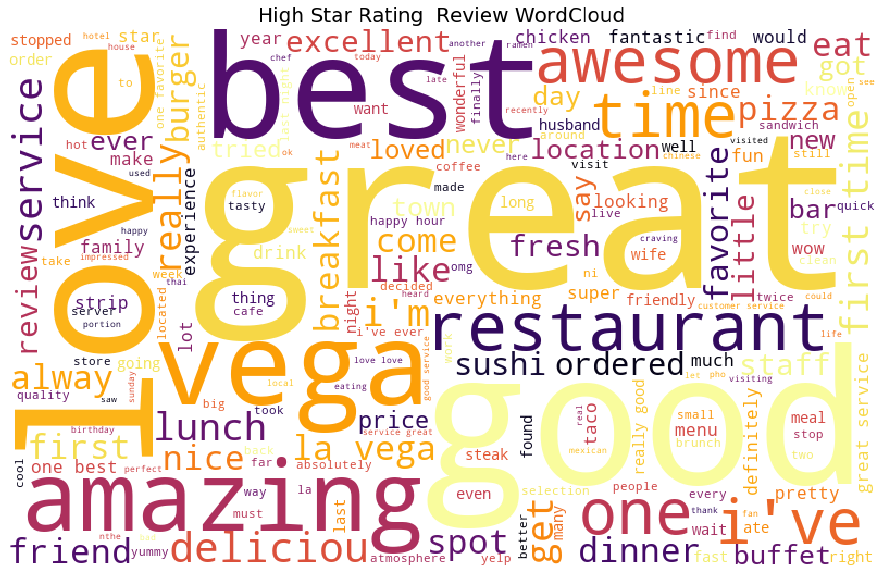

In [ ]:
# High Star Rating  Review WordCloud
wc = WordCloud(width=800, 
               height =500, 
               background_color='white',
               colormap=plt.cm.inferno, stopwords=my_stopwords)\
               .generate(hi_star_rev.to_string(index=False))
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(wc)
plt.title('High Star Rating  Review WordCloud', fontdict={'fontsize':20});

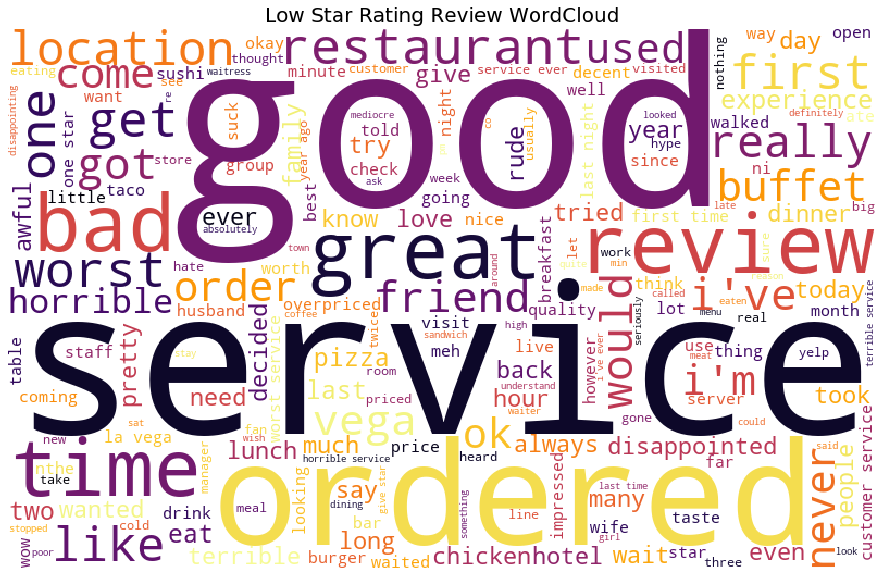

In [ ]:
# Low Star Rating  Review WordCloud
wc = WordCloud(width=800,
               height =500,
               background_color='white',
               colormap=plt.cm.inferno,
               stopwords=my_stopwords\
               ).generate(lo_star_rev.to_string(index=False))
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(wc)
plt.title('Low Star Rating Review WordCloud', fontdict={'fontsize':20});

Interestingly, we can see "service" is the most frequent words in low rating reviews; while in high-star reviews, a common word is “delicious”,  describing the dishes. It appears that bad services might be a deciding factor for people to leave a low star rating. 

Also, several common topics people care in both high star reviews and low star reviews are service/experience, pricing, location, and atmosphere. We suggest Yelp to implement a more holistic star rating system where users can rate on these aspects separately. 

## Conclusion


###Users

> Certain reviewers have more friends who are also active on the review platform, so we define them as “central users”. We want to know how the ratings given by central users correlates to the corresponding restaurant average ratings. (In other words, are the values of these users’ ratings close to real average restaurant ratings?

> From the result, we can see that the ratings of central users are slightly higher than average restaurant ratings, which indicates that people who have more fans tend to overrate the restaurants. Taking into consideration the fact that people tend to read central users’ reviews for suggestions, restaurants might pay central users to write better reviews.

> To increase the authenticity of reviews, Yelp can develop some mechanism such as giving “medals” to central users whose ratings are very close to the overall restaurant ratings. More “medals” these central users have, more trustworthy their reviews are!


###Restaurants

> Yelp allows users to search for restaurants based on tags, which is also an important indicator for yelp users to decide which restaurants to go to.

> First, most of the popular restaurants in Nevada are located in Las Vegas and they are very spread out.

> Second, the average star rating is lower when the restaurant opens at night after 8 pm and higher when it opens at lunch time or dinner time. So we suggest that restaurants open their business of the day around 12 pm or 6 pm and provide special services or dishes during those times. 

> Third, "dogs allowed" has the largest negative effect on stars, whereas "bike parking" has the largest positive effect on stars. So we suggest Yelp can give those restaurants with special attributes like “dogs allowed” a virtual medal like “GOOD OWNER” to encourage them.



###Yelp
>By analyzing reviews, we help Yelp improve user experience and enhance review/star rating credibility. 

1. User experience:  
Wordclouds of reviews inform us that service is a deciding factor leading to low star rating reviews. It also provides topic keywords. Currently, these valuable information are not available on Yelp at a glance.

>Therefore, we suggest that on the front end of Yelp, implement tags created from popular keywords in reviews for each Restaurant. For example, tags like "good service", "fresh", "family friendly" can be updated  in real time. 
On the back end, provide review keyword graphs for each restaurant owner so that they can see what customers are saying about their restaurant.



2. Credibility:  
Credibility is the basis for yelp to become an excellent referencing app in the industry. Fair ratings help customers choose the ideal restaurant and attract more users, in turn, yelp can also help restaurants to improve through user feedback, through which they together constitute abundant echosphere. Whether users' ratings can truly reflect their dining experience is critical. 


>With the sentiment scores of reviews, (a score range from -1 to 1 reflecting user emotion based on the review texts,) we help Yelp filter out abnormal reviews, where average sentiment in the review contradicted to the review star rating.


>We used LSTM model to predict potential star ratings of newly opened restaurants based on review texts, and achieved accuracy of over 68% on validation data and test data. This can help Yelp maintain a credible rating system.

